# Exercises

In [390]:
import math
import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Linear Algebra

### Vectors

We have two 4D vectors
\begin{equation*}
    \vec{v} = \left(1, -2, 5, 0\right)^\mathrm{T}
    \quad\mathrm{and}\quad
    \vec{w} = \left(2, 2, 3, -1\right)^\mathrm{T}
\end{equation*}

1. Calculate the lengths $|\vec{v}|$, $|\vec{w}|$
1. Calculate the sum $\vec{v} + \vec{w}$ and difference $\vec{v} - \vec{w}$
1. Calculate the scalar product $\vec{v}\cdot \vec{w}$
1. What is angle $\phi$ in degrees between both vectors?
1. Find a vector $\vec{u}\neq \vec{0}$ which is orthogonal to $\vec{v}$


#### Exercise 1

The length of an vetor is calculated using
\begin{equation*}
    |\vec{v}| = \sqrt{\sum_{i=1}^n v_i^2}
\end{equation*}

So for the first vector we get
\begin{equation*}
    |\vec{v}| = \sqrt{1^2 + (-2)^2 + 5^2 + 0^2}
        = \sqrt{1 + 4 + 25 + 0} = \sqrt{30} \approx 5.48
\end{equation*}
and for the second one
\begin{equation*}
    |\vec{v}| = \sqrt{2^2 + 2^2 + 3^2 + (-1)^2}
        = \sqrt{4 + 4 + 9 + 1} = \sqrt{18} \approx 4.24
\end{equation*}

See cell below for the computational solution.

In [ ]:
# Computational solution for vector exercise 1
v = [1, -2, 5, 0]
w = [2, 2, 3, -1]


## Using numpy
norm_v = np.linalg.norm(v)
norm_w = np.linalg.norm(w)
print("# Using numpy methods:")
print("Length of v: {:.2f}".format(norm_v))
print("Length of w: {:.2f}".format(norm_w))


## Using standard python
def vec_norm(v):
    """ Calculates the norm of given vector v, input as list """
    return math.sqrt(sum([vi**2 for vi in v]))

norm_v = vec_norm(v)
norm_w = vec_norm(w)
print("\n# Using standard methods:")
print("Length of v: {:.2f}".format(norm_v))
print("Length of w: {:.2f}".format(norm_w))

#### Exercise 2

The sum is simply computed by adding each corresponding elements:
\begin{equation}
 \vec{v} + \vec{w} =
 \left(1 + 2, -2 + 2, 5 + 3, 0 - 1\right)^\mathrm{T} =
 \left(3, 0, 8, -1\right)^\mathrm{T}
\end{equation}
The same for the difference:
\begin{equation}
 \vec{v} - \vec{w} =
 \left(1 - 2, -2 - 2, 5 - 3, 0 + 1\right)^\mathrm{T} =
 \left(-1, -4, 2, 1\right)^\mathrm{T}
\end{equation}

See cell below for computational solution.

In [ ]:
# Computational solution for vector exercise 2
v = [1, -2, 5, 0]
w = [2, 2, 3, -1]


## Using numpy
u1 = np.array(v) + np.array(w)
u2 = np.array(v) - np.array(w)
print("# Using numpy methods:")
print("v + w = ({})^T".format(
    ", ".join(["{:.2f}".format(ui) for ui in u1])))
print("v - w = ({})^T".format(
    ", ".join(["{:.2f}".format(ui) for ui in u2])))


# Using standard python
u1 = [vi + wi for vi, wi in zip(v, w)]
u2 = [vi - wi for vi, wi in zip(v, w)]
print("\n# Using standard methods:")
print("v + w = ({})^T".format(
    ", ".join(["{:.2f}".format(ui) for ui in u1])))
print("v - w = ({})^T".format(
    ", ".join(["{:.2f}".format(ui) for ui in u2])))

#### Exercise 3

For the scalar product we add the products of each corresponding components
\begin{equation}
 \vec{v} \cdot \vec{w} = \sum_{i=1}^n v_i w_i
\end{equation}
and get
\begin{equation}
 \vec{v} \cdot \vec{w} =
 1 \cdot 2 + -2 \cdot 2 + 5 \cdot 3 + 0 \cdot (- 1) =
 2 - 4 + 15 +0 = 13
\end{equation}
for the example vectors.

See cell below for the computational solution.

In [ ]:
# Computational solution for vector exercise 3
v = [1, -2, 5, 0]
w = [2, 2, 3, -1]


## Using numpy
a = np.dot(v, w)
print("# Using numpy methods:")
print("v * w = {:.2f}".format(a))


# Using standard python
a = sum([vi * wi for vi, wi in zip(v, w)])
print("\n# Using standard methods:")
print("v * w = {:.2f}".format(a))

#### Exercise 4

For the angle $\phi$ we use the alternative formula
\begin{equation}
    \cos(\phi) =
    \frac{\vec{v} \cdot \vec{w}}{|\vec{v}|\,|\vec{w}|}
\end{equation}

We already computed all the ingredients (lengths and the scalar product) in the other exercises so we can reuse them here.
Using the inverse cosine we get
\begin{align}
     \cos(\phi)
     &= \arccos\left(
         \frac{\vec{v} \cdot \vec{w}}{|\vec{v}|\,|\vec{w}|}
     \right) \\
     &= \arccos\left(\frac{13}{5.48 * 4.24}\right)
     \approx \arccos(0,56) = 0,98 = 55,98°
\end{align}

See cell below for the computational solution.

In [ ]:
# Computational solution for vector exercise 4
v = [1, -2, 5, 0]
w = [2, 2, 3, -1]

cos_phi = np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w))
phi = np.arccos(cos_phi)
phi_deg = np.rad2deg(phi)
print("The angle is {:.2f}°".format(phi_deg))

#### Exercise 5

To find a orthogonal vector we first note that two vectors are orthogonal when their scalar product vanishes.
Then $\cos(\phi) = 0 \rightarrow \phi = 90°$.
This problem does not have a unique solution.
To get on possible solution, we can fix 3 of the 4 unknown components of $\vec{u}$ and then solve a single equation to find the 4th one which then fullfills the requirement:
Here we simply use the 1st, 2nd and 4th component of $\vec{w}$ for $\vec{u}$ which results in the orthogonal vector
\begin{align}
    \vec{v}\cdot\vec{u} \overset{!}{=} 0 &=
    1 \cdot 2 + -2 \cdot 2 + 5 \cdot u_3 + 0 \cdot -1 \\
    u_3 &= \frac{2}{-5} + \frac{-4}{-5}
    = \frac{2}{5}
\end{align}

Alternatively we could also have noted that the 4th component of $\vec{v}$ is $0$, so any vector of the form $(0, 0, 0, u_4)^\mathrm{T}$ is automatically orthogonal to $\vec{v}$.

See cell below for the computational solution.

In [ ]:
# Computational solution for vector exercise 5
# Here we just prove we found an orthogonal vector,
# because an actual computation is more complicated
v = [1, -2, 5, 0]
u = [2, 2, 2. / 5., -1]

cos_phi = np.dot(v, u) / (np.linalg.norm(v) * np.linalg.norm(u))
phi = np.arccos(cos_phi)
phi_deg = np.rad2deg(phi)
print("The angle is {:.2f}°".format(phi_deg))

### Matrices

1. We have 2 matrices $\underline{A}, \underline{B}$
  and a vector $\vec{v}$
  \begin{equation*}
    \underline{A} =
      \begin{pmatrix} 1 & 2 & 3 \\ 3 & 2 & 1 \end{pmatrix}
    \,\mathrm{, }\quad
    \underline{B} =
      \begin{pmatrix} 0 & 2 \\ 1 & -1 \\ 0 & 1 \end{pmatrix}
    \,\mathrm{, }\quad
    \vec{v} = \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix}
  \end{equation*}
  Calculate $\underline{A}\,\underline{B}$,
  $\underline{B}\,\underline{A}$,
  $\underline{A}\,\vec{v}$ and $\vec{v}^\mathrm{T}\,\underline{B}$.
1. Calculate the inverses (if existing) of
  \begin{equation*}
    \underline{A} =
      \begin{pmatrix} 1 & 2 \\ 4 & 2 \end{pmatrix}
    \quad\mathrm{, }\quad
    \underline{B} =
      \begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix}
  \end{equation*}
1. We have a matrix $\underline{M} = \underline{1}$
  and a vector $\vec{v}^\mathrm{T} = \left(v_1, v_2, v_3\right)$.
  Calculate
  \begin{equation*}
    \vec{v}^\mathrm{T}\, \underline{M}\, \vec{v}
  \end{equation*}

#### Exercise 1

We only calculate $\underline{A}\,\underline{B}$ explicitely here, the rest is done in code.
\begin{align}
    \underline{A}\,\underline{B} &=
    \begin{pmatrix} 
        1 & 2 & 3 \\ 3 & 2 & 1 \end{pmatrix}_{2,3}
    \begin{pmatrix}
        0 & 2 \\ 1 & -1 \\ 0 & 1 \end{pmatrix}_{3, 2} \\
    &=
    \begin{pmatrix}
        1 \cdot 0 + 2 \cdot 1 + 3 \cdot 0 &
        1 \cdot 2 + 2 \cdot -1 + 3 \cdot 1 \\
        3 \cdot 0 + 2 \cdot 1 + 1 \cdot 0 &
        3 \cdot 2 + 2 \cdot -1 + 1 \cdot 1
    \end{pmatrix}_{2,2} = 
    \begin{pmatrix}
        2 & 3 \\ 2 & 5
    \end{pmatrix}_{2,2}
\end{align}

See cell below for the computational solution.

In [ ]:
# Computational solution for matrix exercise 1
A = [[1, 2, 3], [3, 2, 1]]  # row-wise definition as in C
B = [[0, 2], [1, -1], [0, 1]]
v = np.array([[4], [5], [6]])  # Using an explicit column vector

AB = np.matmul(A, B)
BA = np.matmul(B, A)
Av = np.matmul(A, v)
vB = np.matmul(v.T, B)
dimAB = AB.shape
dimBA = BA.shape
dimAv = Av.shape
dimvB = vB.shape

print("AB =\n{}".format(AB))
print("  Dimensions: {}".format(dimAB))
print("\nBA =\n{}".format(BA))
print("  Dimensions: {}".format(dimBA))
print("\nAv =\n{}".format(Av))
print("  Dimensions: {}".format(dimAv))
print("\nvB = {}".format(vB))
print("  Dimensions: {}".format(dimvB))

#### Exercise 2

For these $(2,2)$ matrices we can use the explicit formula for the inverse
\begin{equation}
  \underline{A}^{-1} =
  \frac{1}{1 \cdot 2 - 4 \cdot 2}
  \begin{pmatrix}2 & -2 \\ -4 & 1\end{pmatrix} =
  \begin{pmatrix}
      -\frac{1}{3} & \frac{1}{3} \\
      \frac{2}{3} & -\frac{1}{6}
  \end{pmatrix}
\end{equation}

The inverse of $\underline{B}$ does not exist, because both rows are multiples of each other.
This mean it has not full rank or one of its eigenvalues is $0$ or the denominator of the factor for the inverse computation ("determinant") is zero
\begin{equation}
  \frac{1}{1 \cdot 4 - 2 \cdot 2} = \frac{1}{0}
\end{equation}

See cell below for the computational solution.

In [ ]:
# Computational solution for matrix exercise 2
A = [[1, 2], [4, 2]]
B = [[1, 2], [2, 4]]

Ainv = np.linalg.inv(A)
test1 = np.matmul(Ainv, A)
test2 = np.matmul(A, Ainv)
print("Ainv =\n{}".format(Ainv))
print("  Dimensions: {}".format(Ainv.shape))
print("Test if Ainv * A is identity:")
print("  Ainv * A =\n{}".format(test1))
print("  A * Ainv =\n{}".format(test2))

# This will fail
try:
    Binv = np.linalg.inv(B)
except np.linalg.LinAlgError as err:
    print("\nCalculation of inverse of B failed, reason: ", err)

#### Exercise 3

This form is equivalent to computing the scalar product of $\vec{v}$ with itself but using the matrix multiplication formalism:
\begin{equation}
    \vec{v}^\mathrm{T}\,\underline{1}\,\vec{v} =
    \left(v_1, v_2, v_3\right)
    \begin{pmatrix}
     1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}v_1 \\ v_2 \\ v_3\end{pmatrix} =
    v_1^2 + v_2^2 + v_3^2 =
    \vec{v} \cdot \vec{v}
\end{equation}
The result would be identical without the identity matrix in the center.

Note: In a multidimensional gaussian the same form is used, but with the inverse covariance matrix in the middle
\begin{equation}
    \mathcal{N}(\vec{\mu}, \underline{\Sigma}) \propto
    \exp\left(
        -\frac{1}{2}
        \left(\vec{x}-\vec{\mu}\right)^\mathrm{T}
        \Sigma^{-1}
        \left(\vec{x}-\vec{\mu}\right)
    \right)
\end{equation}
so that in the end the exponential receives a single number as the argument.

See cell below for the computational solution.

In [ ]:
# Computational solution for matrix exercise 3
v = np.array([[1], [2], [3]])  # As an example
ID = np.eye(len(v))
res = np.matmul(np.matmul(v.T, ID), v)

v = [1, 2, 3]  # Flat vector only version
comp = np.dot(v, v)

print("Matrix: vT * 1 * v = {}".format(res))  # Gives a (1, 1) matrix
print("Vector: v * v = {}".format(comp))  # Gives a scalar

### Convolution

For the following exercises, pad the signal function with zeroes where appropriate.
Additionally you can also try cyclic, mirrored or "expanded" edges or only calculate the convolution where the signal is valid.

1. Consider a discrete signal $f[i] = 3\delta[i]$ (value of $3$ at position $i=0$) and a response $g[i] = \left\{g[i=0] = 2, g[i=1] = 1\right\}$.
Compute the convolution $f*g$ for all non-zero components.
1. Now we have a more complicated signal $f[i] = \left\{f[i=0] = 3, f[i=1] = 4, f[i=2] = 5\right\}$.
Compute $f*g$ with the same kernel $g$ as above.
Tip: \emph{For grasping the concept of why the kernel is flipped, try to imagine how each signal contribution triggered the response. The response needs some time to arrive at the current index which in the end gives you the flipped response in the formula.}
1. Now we try a 2D convolution.
  Convolve the following $6x6$ "grayscale images"
  \begin{equation*}
    \mathrm{Img}_1 = \begin{pmatrix}
      0 & 0 & 1 & 3 & 0 & 0 \\
      0 & 0 & 1 & 3 & 0 & 0 \\
      0 & 0 & 1 & 3 & 0 & 0 \\
      0 & 0 & 1 & 3 & 0 & 0 \\
      0 & 0 & 1 & 3 & 0 & 0 \\
      0 & 0 & 1 & 3 & 0 & 0
    \end{pmatrix}
    \quad\mathrm{and}\quad
    \mathrm{Img}_2 = \mathrm{Img}_1^\mathrm{T}
  \end{equation*}
  with a $3x3$ "vertical edge finding" kernel
  \begin{equation*}
    \begin{pmatrix}
      0 & 1 & 0 \\
      0 & 1 & 0 \\
      0 & 1 & 0
    \end{pmatrix}
  \end{equation*}
Interpret the results.

#### Helper functions

In [370]:
def convolve1D(signal, kernel, mode="same"):
    """
    Signal is padded with zeroes. mode in ['full', 'same'], see scipy.
    """
    if mode not in ["full", "same"]:
        raise ValueError("'mode' must be one of 'full', 'same'.")
    
    signal = np.atleast_1d(signal)
    kernel = np.atleast_1d(kernel)
    
    # Fits either centralized (odd) or even kernel
    sig_w, kern_w = len(signal), len(kernel)
    pad_w = kern_w // 2
    pad = np.concatenate((pad_w * [0], signal, pad_w * [0]))

    if mode == "same":
        # Same size as input, do not extend into the padded area in the end,
        # even if we could due to the kernel size
        out = np.zeros_like(signal)
    else:
        # At the signal end, we can convolve until we run out of kernel values
        out = np.zeros(shape=(sig_w + pad_w))
        
    # Iterate image pixels
    for i in range(len(out)):
            # Iterate kernel
            for ki in range(kern_w):
                    # Pad index: Respect padded image (+pad_w), kernel is NOT
                    # centered in 1D (in images it is, so we need 2*pad_w there)
                    out[i] += pad[i + pad_w - ki] * kernel[ki]
    
    return out

In [ ]:
def convolve2D(img, kernel):
    """
    Simple 2D convolution, uses zero padding. Output is same size as input.
    """
    img = np.atleast_2d(img)
    img_h, img_w = img.shape
    kernel = np.atleast_2d(kernel)
    kern_h, kern_w = kernel.shape
    # Pad img with zeros (fits odd and even kernels in each dimension)
    pad_w, pad_h = kern_w // 2, kern_h // 2
    pad = np.zeros(shape=(img_w + pad_w * 2, img_h + pad_h * 2))
    pad[pad_w:img_w + pad_w, pad_h:img_h + pad_h] = img

    out = np.zeros_like(img)
    # Iterate image pixels
    for i in range(img_h):  # First dimension (rows)
        for j in range(img_w):  # Second dimension (cols)
            # Iterate kernel
            for ki in range(kern_h):  # rows
                for kj in range(kern_w):  # cols
                    # Pad index: Respect padded image (+pad_*) and centered
                    # kernel (another +pad_*)
                    out[i, j] += (pad[i + 2 * pad_h - ki, j + 2 * pad_w - kj] *
                                  kernel[ki, kj])
    
    return out

In [400]:
def make_conv_plot(signal, kernel, conv):
    signal = np.atleast_1d(signal)
    kernel = np.atleast_1d(kernel)
    conv = np.atleast_1d(conv)
    
    fig, (axt, axc, axb) = plt.subplots(
        3, 1, figsize=(5, 5), sharex=True, sharey=True)
    # Top: Signal
    axt.plot(np.arange(len(signal)), signal, marker="o", color="C7", ls="")
    axt.vlines(np.arange(len(signal)), 0, signal, color="C7")
    axt.set_title("Signal")
    axt.grid()
    # Middle: Kernel
    axc.plot(np.arange(len(kernel)), kernel, marker="o", color="C7", ls="")
    axc.vlines(np.arange(len(kernel)), 0, kernel, color="C7")
    axc.set_title("Kernel")
    axc.grid()
    # Bottom: Convolution
    axb.plot(np.arange(len(conv)), conv, marker="o", color="C7", ls="")
    axb.vlines(np.arange(len(conv)), 0, conv, color="C7")
    axb.set_xlabel("index")
    axb.set_title("Convolution")
    axb.grid()
    for axi in (axt, axc, axb):
        axi.set_ylim(0, 1 + np.max(conv))
        # Only int ticks (stackoverflow.com/questions/30914462)
        axi.xaxis.set_major_locator(MaxNLocator(integer=True))
        axi.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.tight_layout()

In [ ]:
def make_kernel_boundary_at(x, y, kernel):
    """ Make rectangle border from given kernel, (x, y) is the center point """
    kernel = np.atleast_1d(kernel)
    h, w = kernel.shape
    
    # Make boundaries, w, h one wider because pixels shall be enclosed (border)
    xs = np.array([0, w, w, 0, 0])
    ys = np.array([0, 0, h, h, 0])
    # Shift origin to center (even kernels are centered to bottom right)(scipy)
    x -= w // 2
    y -= h // 2
    
    if w % 2 == 0:  # Even kernel horizontal
        x += 0  # Explicit, do not delete. If += 1, then center is top left
    if h % 2 == 0:  # Even kernel vertical
        y += 0  # Eplicit
        
    return x + xs, y + ys

#### Exercise 1

We call the convolved output array $y[i]$ .
The convolution formula is
\begin{equation*}
    y[i] = (f*g)[i] = \sum_{k=-\infty}^{\infty} f[k]g[i-k]
\end{equation*}

Setting the formula aside for a moment, we can derive the soultion intuitively here.
We also assume that the signal and the kernel is zero (padded) for every not explicitely defined index.
Also the both kernel and signal arrays are assumend to start at the same "time" index $0$.

As we have no other contributions from the signal except the single peak, the output is simply the kernel array scaled with the signal value:
\begin{align*}
y[0] &= f[0] \cdot g[0] = 6 \\
y[1] &= f[0] \cdot g[1] = 3 \\
y[i] &= 0 \mathrm{\,for\,} i > 1
\end{align*}

This is exactly the same result we would get when using the explicit convolution formula:
\begin{align*}
y[0] &= f[0] \cdot g[0 - 0] + f[1] \cdot g[0 - 1] + \dots =
    3 \cdot 2 + 0 \cdot 0 + 0 + \dots = 6 \\
y[1] &= f[0] \cdot g[1 - 0] + f[1] \cdot g[1 - 1] + \dots =
    3 \cdot 1 + 0 \cdot 2 + 0 + \dots = 3 \\
y[i] &= 0 \mathrm{\,for\,} i > 1
\end{align*}

See cell below for the computational solution.

Mode: full
  Own  :  [6. 3.]
  Scipy:  [6 3]
  Both equal: True


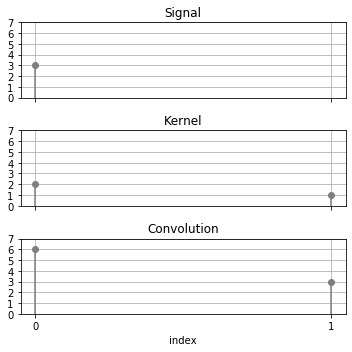

In [401]:
# Computational solution for convolution exercise 1
signal = [3,]
kernel = [2, 1]

mode = "full"
conv_own = convolve1D(signal, kernel, mode=mode)
conv_scipy = scs.convolve(signal, kernel, mode=mode)

print("Mode: {}".format(mode))
print("  Own  : ", conv_own)
print("  Scipy: ", conv_scipy)
print("  Both equal: {}".format(
    "True" if np.allclose(conv_scipy, conv_own) else "False"))

make_conv_plot(signal, kernel, conv_own)

#### Exercise 2

Now that we know how a single input peak behaves, the convolution of a larger signal is also easy to understand: We convolve every single peak with the response and then sum each individual result.

Using the explicit convolution formula:
\begin{align*}
y[0] &= f[0] \cdot g[0 - 0] +
        f[1] \cdot g[0 - 1] +
        f[2] \cdot g[0 - 2] + \dots \\
    &= 3 \cdot 2 + 4 \cdot 0 + 5 \cdot 0 + \dots = 6 \\
y[1] &= f[0] \cdot g[1 - 0] +
        f[1] \cdot g[1 - 1] +
        f[2] \cdot g[1 - 2] + \dots \\
    & = 3 \cdot 1 + 4 \cdot 2 + 5 \cdot 0 + \dots = 11 \\
y[2] &= f[0] \cdot g[2 - 0] +
        f[1] \cdot g[2 - 1] +
        f[2] \cdot g[2 - 2] + \dots \\
    &= 3 \cdot 0 + 4 \cdot 1 + 5 \cdot 2 + \dots = 14 \\
y[3] &= f[0] \cdot g[3 - 0] +
        f[1] \cdot g[3 - 1] +
        f[2] \cdot g[3 - 2] + \dots \\
    &= 3 \cdot 0 + 4 \cdot 0 + 5 \cdot 1 + \dots = 5
\end{align*}

See cell below for the computational solution.

Mode: full
  Own  :  [ 6. 11. 14.  5.]
  Scipy:  [ 6 11 14  5]
  Both equal: True


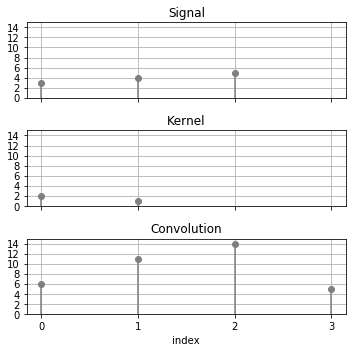

In [402]:
# Computational solution for convolution exercise 2
signal = [3, 4, 5]
kernel = [2, 1]

mode = "full"
conv_own = convolve1D(signal, kernel, mode=mode)
conv_scipy = scs.convolve(signal, kernel, mode=mode)

print("Mode: {}".format(mode))
print("  Own  : ", conv_own)
print("  Scipy: ", conv_scipy)
print("  Both equal: {}".format(
    "True" if np.allclose(conv_scipy, conv_own) else "False"))

make_conv_plot(signal, kernel, conv_own)

#### Exercise 3

Here we do the same thing as in the 1D case, but we sum over both horizontal and vertical indices.
We pick the index $(3, 2)$ to calculate an example by hand:
\begin{align}
    y[3, 2] = 
        &f[2, 1] \cdot g[2, 2] +
            f[3, 1] \cdot g[1, 2] +
            f[4, 1] \cdot g[0, 2] + \\
        &f[2, 2] \cdot g[2, 1] + 
            f[3, 2] \cdot g[1, 1] + 
            f[4, 2] \cdot g[0, 1] + \\
        &f[2, 3] \cdot g[2, 0] + 
            f[3, 3] \cdot g[1, 0] + 
            f[4, 3] \cdot g[0, 0] \\ = 
        & 1 \cdot 0 +
            3 \cdot 1 +
            0 \cdot 0 + \\
        & 1 \cdot 0 + 
            3 \cdot 1 + 
            0 \cdot 0 + \\
        & 1 \cdot 0 + 
            3 \cdot 1 + 
            0 \cdot 0 \\ =
        & 3 + 3 + 3 = 9
\end{align}

Note 1: The kernel indices are assumed to be symmetrical in image
convolutions (just per convention) so this differes a bit from
1D signals where the kernel is taken to start from the leftmost coordinate at $t=0$.

Note 2: The kernel is indeed flipped, however due to its symmetric layout it is not noticable from the values, but only from the noted indices.

See cell below for the computational solution.
The example pixel is highlighted in the plots.

In [403]:
# Computational solution for convolution exercise 3
img = np.array(6 * [[0, 0, 1, 3, 0, 0]])
kernel = np.array(3 * [[0, 1, 0]])
print("Image:\n", img)
print("\nKernel:\n", kernel)

conv_scipy = scs.convolve2d(img, kernel, mode="same")
conv_own = convolve2D(img, kernel)

print("\nScipy:\n", conv_scipy)
print("\nOwn:\n", conv_own)

# Note: Difference from non centered kernels seems to be from which direction is
# preferred when applying the kernel. Mine is top left, scipys is bottom right?
print("\nBoth equal: {}".format(
    "True" if np.allclose(conv_scipy, conv_own) else "False"))

Image:
 [[0 0 1 3 0 0]
 [0 0 1 3 0 0]
 [0 0 1 3 0 0]
 [0 0 1 3 0 0]
 [0 0 1 3 0 0]
 [0 0 1 3 0 0]]

Kernel:
 [[0 1 0]
 [0 1 0]
 [0 1 0]]

Scipy:
 [[0 0 2 6 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 2 6 0 0]]

Own:
 [[0 0 2 6 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 3 9 0 0]
 [0 0 2 6 0 0]]

Both equal: True


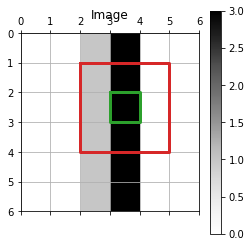

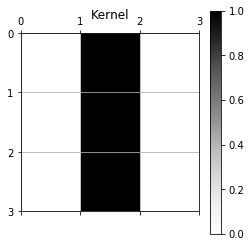

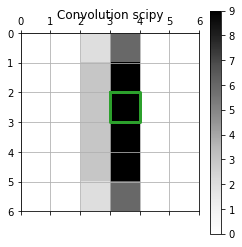

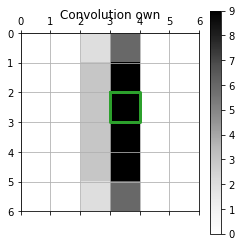

In [404]:
# Example pixel and kernel borders
cntr_x, cntr_y = 3, 2
exmpl_xs_cntr, exmpl_ys_cntr = make_kernel_boundary_at(cntr_x, cntr_y, [[0]])  # dummy
exmpl_xs_kern, exmpl_ys_kern = make_kernel_boundary_at(cntr_x, cntr_y, kernel)

plt.matshow(img, cmap="Greys", extent=(0, img.shape[1], img.shape[0], 0))
plt.plot(exmpl_xs_cntr, exmpl_ys_cntr, c="C2", lw=3)  # Example pixel
plt.plot(exmpl_xs_kern, exmpl_ys_kern, c="C3", lw=3)  # Kernel region
plt.grid()
plt.colorbar()
plt.title("Image")
plt.show()

plt.matshow(kernel, cmap="Greys", extent=(0, kernel.shape[1], kernel.shape[0], 0))
plt.grid()
plt.colorbar()
plt.title("Kernel")
plt.show()

plt.matshow(conv_scipy, cmap="Greys",
            extent=(0, conv_scipy.shape[1], conv_scipy.shape[0], 0))
plt.plot(exmpl_xs_cntr, exmpl_ys_cntr, c="C2", lw=3)  # Example pixel
plt.grid()
plt.colorbar()
plt.title("Convolution scipy")
plt.show()

plt.matshow(conv_own, cmap="Greys",
            extent=(0, conv_own.shape[1], conv_own.shape[0], 0))
plt.plot(exmpl_xs_cntr, exmpl_ys_cntr, c="C2", lw=3)  # Example pixel
plt.grid()
plt.colorbar()
plt.title("Convolution own")
plt.show()